# [선형회귀모델 실습 2: 예측 및 평가]

## 1. 모듈 불러오기

In [1]:
from IPython.display import display, HTML

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 성능 평가 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 2. 데이터 불러오기: California Housing Data
#### 데이터 구조  
- 데이터: 1990년 캘리포니아의 각 행정 구역 내 주택 가격  
- 관측치 개수: 20640개
- 변수 개수: 설명변수 8개 / 반응변수 1개

#### 설명 변수(예측값을 설명할 수 있는 변수)      
- MedInc : 행정 구역 내 소득의 중앙값
- HouseAge : 행정 구역 내 주택 연식의 중앙값
- AveRooms : 평균 방 갯수
- AveBedrms : 평균 침실 갯수
- Population : 행정 구역 내 인구 수
- AveOccup : 평균 자가 비율
- Latitude : 해당 행정 구역의 위도
- Longitude : 해당 행정 구역의 경도 

#### 반응 변수(예측하고자 하는 값)
- House Value: 주택가격

In [2]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['House Value'])

## 3. 데이터 전처리

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y.head()

,House Value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
data = pd.concat([X, y], axis=1)

In [7]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 모델을 학습(train) 및 테스트(test) 데이터로 분리
<br>

![alt text](Figures/Train_Test.png"")
<br>

In [8]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=20190625)

In [9]:
train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
9795,6.5234,18.0,7.292627,1.228111,1312.0,3.023041,36.52,-121.84,3.574
10164,4.4375,24.0,5.791304,1.095652,625.0,2.717391,33.89,-117.96,3.341
4647,2.1435,52.0,2.809524,1.000000,1920.0,2.539683,34.06,-118.31,3.289
16452,2.1979,52.0,4.804444,1.142222,437.0,1.942222,38.13,-121.27,1.141
11613,4.8000,21.0,4.603774,1.056604,1215.0,2.547170,33.80,-118.06,1.969


In [10]:
train_data.shape

(14448, 9)

In [11]:
test_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
4051,3.2241,28.0,4.188377,1.139613,2549.0,1.702739,34.15,-118.43,2.958
17595,3.3682,40.0,6.045902,1.114754,719.0,2.357377,37.31,-121.89,2.352
7100,5.6454,33.0,5.642298,1.000000,1235.0,3.224543,33.90,-117.99,2.028
7263,2.1912,37.0,2.423077,1.128205,714.0,4.576923,33.99,-118.23,1.125
12717,5.8336,36.0,7.460000,0.960000,414.0,2.760000,38.60,-121.37,2.833


In [12]:
test_data.shape

(6192, 9)

## 4. 모델링
 - OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2 ...) 구하는 방법
 - 모델 선언: model = sm.OLS(Y데이터, X데이터)   
 - 모델 학습: model_trained = model.fit()

In [13]:
lm = sm.OLS(train_data['House Value'], train_data.drop(['House Value'], axis=1))

In [14]:
lm_trained = lm.fit()

## 5. 모델 해석

In [15]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.506e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        15:19:45   Log-Likelihood:                         -16809.
No. Observations:               14448   AIC:                                  3.363e+04
Df Residuals:                   14440   BIC:                                  3.369e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5071      0.005    101.645      0.000       0.497       0.517
HouseAge       0.0164      0.001     29.841      0.000       0.015       0.017
AveRooms      -0.1721      0.007    -23.757      0.000      -0.186      -0.158
AveBedrms      0.8081      0.035     23.416      0.000       0.740       0.876
Population   1.48e-05   6.12e-06      2.418      0.016     2.8e-06    2.68e-05
AveOccup      -0.0059      0.001     -5.963      0.000      -0.008      -0.004
Latitude      -0.0633      0.004    -14.867      0.000      -0.072      -0.055
Longitude     -0.0162      0.001    -11.987      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     2967.936   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10128.918
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                       6.554   Cond. No.                     9.92e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 6. 예측 값 도출 및 예측 성능 평가

### 학습 데이터 (Training Data)에 대한 (1) 예측 및 (2) 성능 평가

In [16]:
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
9795,6.5234,18.0,7.292627,1.228111,1312.0,3.023041,36.52,-121.84,3.574
10164,4.4375,24.0,5.791304,1.095652,625.0,2.717391,33.89,-117.96,3.341
4647,2.1435,52.0,2.809524,1.000000,1920.0,2.539683,34.06,-118.31,3.289
16452,2.1979,52.0,4.804444,1.142222,437.0,1.942222,38.13,-121.27,1.141
11613,4.8000,21.0,4.603774,1.056604,1215.0,2.547170,33.80,-118.06,1.969
...,...,...,...,...,...,...,...,...,...
879,3.8179,24.0,5.115768,0.968064,1174.0,2.343313,37.56,-122.01,2.161
13751,5.0227,9.0,6.269565,0.952174,633.0,2.752174,34.05,-117.15,1.623
8520,2.6091,21.0,3.783954,1.136963,5546.0,3.178223,33.90,-118.33,1.639
1727,0.7403,37.0,4.491429,1.148571,1046.0,2.988571,37.96,-122.37,0.686


In [17]:
train_pred = lm_trained.predict(train_data.drop(['House Value'], axis=1))

In [18]:
train_pred

9795     3.000859
10164    2.288211
4647     2.034998
16452    1.605928
11613    2.612775
           ...   
879      1.830746
13751    2.117512
8520     1.766321
1727     0.711405
14245    1.386619
Length: 14448, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


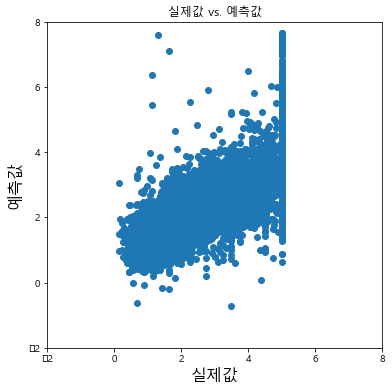

In [19]:
plt.figure(figsize=(6, 6))
plt.title('실제값 vs. 예측값')
plt.scatter(train_data['House Value'], train_pred)
plt.xlabel('실제값', size=16)
plt.ylabel('예측값', size=16)
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [21]:
print('Training MSE: {:.3f}'.format(mean_squared_error(train_data['House Value'], train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data['House Value'], train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(train_data['House Value'], train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(train_data['House Value'], train_pred)))

Training MSE: 0.600
Training RMSE: 0.775
Training MAE: 0.572
Training MAPE: 34.807


### 테스트 데이터 (Testing Data)에 대한 예측 성능 평가

In [22]:
test_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
4051,3.2241,28.0,4.188377,1.139613,2549.0,1.702739,34.15,-118.43,2.958
17595,3.3682,40.0,6.045902,1.114754,719.0,2.357377,37.31,-121.89,2.352
7100,5.6454,33.0,5.642298,1.000000,1235.0,3.224543,33.90,-117.99,2.028
7263,2.1912,37.0,2.423077,1.128205,714.0,4.576923,33.99,-118.23,1.125
12717,5.8336,36.0,7.460000,0.960000,414.0,2.760000,38.60,-121.37,2.833
...,...,...,...,...,...,...,...,...,...
17647,3.5625,32.0,5.016373,1.103275,1989.0,2.505038,37.26,-121.91,2.552
16862,4.2262,37.0,4.362369,0.958188,878.0,3.059233,37.63,-122.41,2.285
16615,3.6908,23.0,7.406475,1.273381,636.0,2.287770,35.40,-120.92,2.788
6435,3.5625,43.0,5.647416,1.048632,1054.0,3.203647,34.11,-118.01,2.116


In [23]:
test_pred = lm_trained.predict(test_data.drop(['House Value'], axis=1))

In [24]:
display(test_pred)

4051     2.075514
17595    1.830442
7100     3.002480
7263     1.956814
12717    2.549611
           ...   
17647    1.987220
16862    2.366030
16615    1.713752
6435     2.133077
17715    2.541404
Length: 6192, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


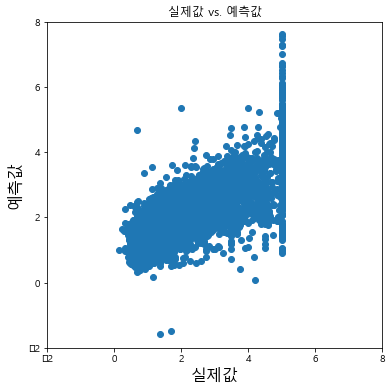

Testing MSE: 0.616
Testing RMSE: 0.785
Testing MAE: 0.576
Testing MAPE: 34.388


In [25]:
plt.figure(figsize=(6, 6))
plt.title('실제값 vs. 예측값')
plt.scatter(test_data['House Value'], test_pred)
plt.xlabel('실제값', size=16)
plt.ylabel('예측값', size=16)
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.show()

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data['House Value'], test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data['House Value'], test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(test_data['House Value'], test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(test_data['House Value'], test_pred)))